# Sampling from a Biased Population

This notebook replicates the weight measurement dataset shown in the web application of the course. Basically, we have a population on the University of Michigan (UoM) campus with a weight distribution and a subset of people that go to the gym. We then take different samples and plot the weight estimates: a probability sample, a biased sample with gym-goers, etc.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

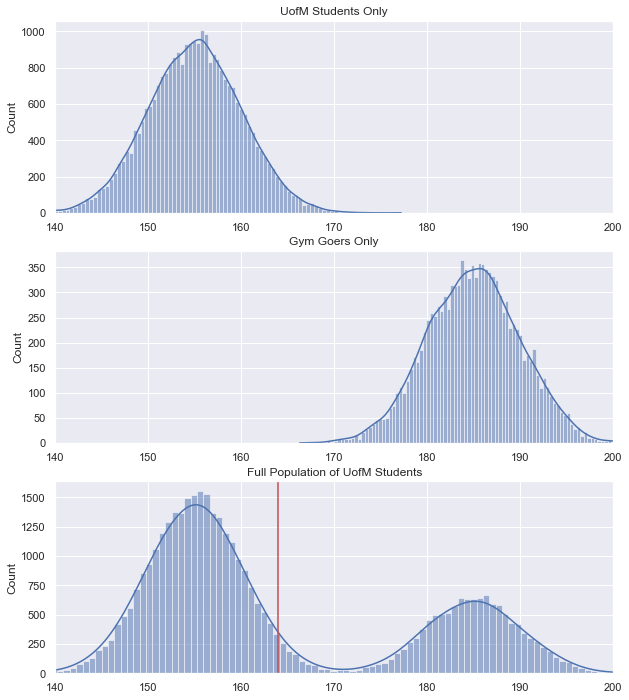

In [9]:
# Simulation parameters: UoM vs Gym-goers
mean_uofm = 155
sd_uofm = 5
mean_gym = 185 
sd_gym = 5 
# Which proportion goes to the gym?
gymperc = 0.3
totalPopSize = 40000

# Create the distributions of the two subgroups
# Arrays of random weights are created
# following the normal distribution with the above params
uofm_students = np.random.normal(mean_uofm, sd_uofm, int(totalPopSize * (1 - gymperc)))
students_at_gym = np.random.normal(mean_gym, sd_gym, int(totalPopSize * (gymperc)))

# Create the population from the subgroups: concatenate both arrays
population = np.append(uofm_students, students_at_gym)

# Plot
plt.figure(figsize=(10,12))

# UofM students only
plt.subplot(3,1,1)
sns.histplot(uofm_students,kde=True,bins=100)
plt.title("UofM Students Only")
plt.xlim([140,200])

# Gym-Goers only
plt.subplot(3,1,2)
sns.histplot(students_at_gym,kde=True,bins=100)
plt.title("Gym Goers Only")
plt.xlim([140,200])

# Both groups together
plt.subplot(3,1,3)
sns.histplot(population,kde=True,bins=100)
plt.title("Full Population of UofM Students")
# Population mean: vertical line
plt.axvline(x = np.mean(population),color='r')
plt.xlim([140,200])

# This line is necessary only if we plot from a python file...
plt.show()

### Sampling Distributions: Biased vs Unbiased

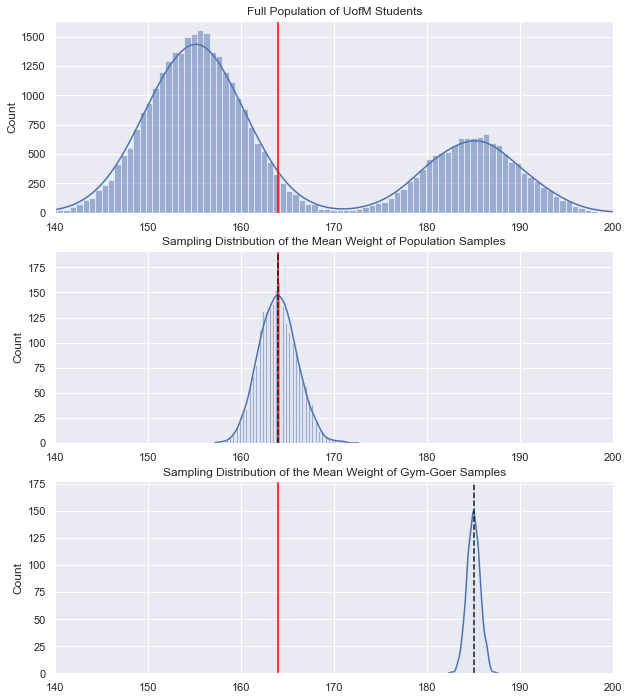

In [19]:
# Simulation parameters
numberSamps = 5000 # How many samples do I draw?
sampSize = 50 # Sampling size = number of units in sample

# UNBIASED Sampling Distribution
# Get the sampling distribution of the mean from the total population
# Allocate empty vector and fill it in; otherwise, we could've used append()
mean_distribution_unbiased = np.empty(numberSamps)
for i in range(numberSamps):
    # Pick sampSize random units (uniform, because units are already normally distributed)
    random_students = np.random.choice(population, sampSize)
    mean_distribution_unbiased[i] = np.mean(random_students) 

# BIASED Sampling Distribution
# Get the sampling distribution of the mean from only the gym
mean_distribution_biased = np.empty(numberSamps)
for i in range(numberSamps):
    # Pick sampSize random units (uniform, because units are already normally distributed)
    random_students = np.random.choice(students_at_gym, sampSize)
    mean_distribution_biased[i] = np.mean(random_students) 
    
# Plot
plt.figure(figsize = (10,12))

# Population
plt.subplot(3,1,1)
sns.histplot(population,kde=True,bins=100)
plt.title("Full Population of UofM Students")
plt.axvline(x = np.mean(population), color='red')
plt.xlim([140,200])

# UNBIASED
# Sampling distribution = distribution of sample means we drew from population
plt.subplot(3,1,2)
sns.histplot(mean_distribution_unbiased,kde=True,bins=100)
plt.title("Sampling Distribution of the Mean Weight of Population Samples")
plt.axvline(x = np.mean(population), color='red')
plt.axvline(x = np.mean(mean_distribution_unbiased), color = "k", linestyle='--')
plt.xlim([140,200])

# BIASED
# Sampling distribution = distribution of sample means we drew from gym-goers subset
plt.subplot(3,1,3)
sns.histplot(mean_distribution_biased,kde=True,bins=100)
plt.title("Sampling Distribution of the Mean Weight of Gym-Goer Samples")
plt.axvline(x = np.mean(population), color='red')
plt.axvline(x = np.mean(mean_distribution_biased), color = "k", linestyle='--')
plt.xlim([140,200])

plt.show()